In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from keras.utils.np_utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout
from keras.optimizers import RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

In [48]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [49]:
x_train = train.drop('label',axis=1)
y_train = train['label']

In [50]:
y_train.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [51]:
x_train = x_train / 255 
test = test / 255

In [52]:
x_train = x_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)

In [53]:
y_train = to_categorical(y_train,num_classes=10)

In [54]:
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train,test_size=0.1,random_state = 42)

In [55]:
#plt.imshow(x_train[0])

In [56]:
model = Sequential()

model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu', input_shape=(28,28,1)))
model.add(Conv2D(filters=32, kernel_size=(5,5), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), padding='Same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10,activation='softmax'))

In [57]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08,decay=0)

In [58]:
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'] )

In [59]:
lr_reduction = ReduceLROnPlateau(monitor='val_acc',
    factor=0.5,
    patience=3,
    verbose=1,
    min_lr=0.00001)

In [60]:
epochs = 40
batch_size = 86

In [61]:
generator = ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)

generator.fit(x_train)

In [69]:
history = model.fit_generator(generator.flow(x_train,y_train,batch_size=batch_size),
    epochs=epochs,
    validation_data=(x_val,y_val),
    verbose=2,
    steps_per_epoch=x_train.shape[0] // batch_size,
    callbacks=[lr_reduction],
    )

C:\Users\admin\anaconda3\lib\site-packages\tensorflow\python\keras\engine\training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/40
439/439 - 150s - loss: 0.0953 - accuracy: 0.9709 - val_loss: 0.0321 - val_accuracy: 0.9883
Epoch 2/40
439/439 - 149s - loss: 0.0776 - accuracy: 0.9765 - val_loss: 0.0383 - val_accuracy: 0.9890
Epoch 3/40
439/439 - 134s - loss: 0.0716 - accuracy: 0.9793 - val_loss: 0.0308 - val_accuracy: 0.9907
Epoch 4/40
439/439 - 139s - loss: 0.0672 - accuracy: 0.9806 - val_loss: 0.0270 - val_accuracy: 0.9912
Epoch 5/40
439/439 - 139s - loss: 0.0644 - accuracy: 0.9807 - val_loss: 0.0276 - val_accuracy: 0.9917
Epoch 6/40
439/439 - 140s - loss: 0.0614 - accuracy: 0.9832 - val_loss: 0.0305 - val_accuracy: 0.9902
Epoch 7/40
439/439 - 143s - loss: 0.0583 - accuracy: 0.9830 - val_loss: 0.0278 - val_accuracy: 0.9898
Epoch 8/40
439/439 - 138s - loss: 0.0603 - accuracy: 0.9825 - val_loss: 0.0323 - val_accuracy: 0.9910
Epoch 9/40
439/439 - 139s - loss: 0.0621 - accuracy: 0.9833 - val_loss: 0.0396 - val_accuracy: 0.9898
Epoch 10/40
439/439 - 140s - loss: 0.0600 - accuracy: 0.9841 - val_loss: 0.0296 - 

Epoch 32/40
439/439 - 142s - loss: 0.0857 - accuracy: 0.9800 - val_loss: 0.0432 - val_accuracy: 0.9886
Epoch 33/40
439/439 - 141s - loss: 0.0865 - accuracy: 0.9805 - val_loss: 0.0887 - val_accuracy: 0.9867
Epoch 34/40
439/439 - 144s - loss: 0.0888 - accuracy: 0.9793 - val_loss: 0.0489 - val_accuracy: 0.9907
Epoch 35/40
439/439 - 137s - loss: 0.0872 - accuracy: 0.9801 - val_loss: 0.0606 - val_accuracy: 0.9902
Epoch 36/40
439/439 - 138s - loss: 0.0918 - accuracy: 0.9785 - val_loss: 0.0486 - val_accuracy: 0.9890
Epoch 37/40
439/439 - 151s - loss: 0.0904 - accuracy: 0.9790 - val_loss: 0.0593 - val_accuracy: 0.9895
Epoch 38/40
439/439 - 144s - loss: 0.0914 - accuracy: 0.9791 - val_loss: 0.0758 - val_accuracy: 0.9924
Epoch 39/40
439/439 - 143s - loss: 0.0916 - accuracy: 0.9789 - val_loss: 0.0410 - val_accuracy: 0.9912
Epoch 40/40
439/439 - 216s - loss: 0.0913 - accuracy: 0.9784 - val_loss: 0.0848 - val_accuracy: 0.9862


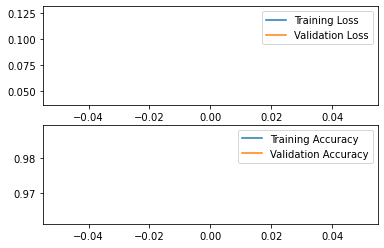

In [68]:
fig, ax = plt.subplots(2,1)
ax[0].plot(history.history['loss'],label='Training Loss')
ax[0].plot(history.history['val_loss'],label='Validation Loss')
ax[0].legend(loc='best')

ax[1].plot(history.history['accuracy'],label='Training Accuracy')
ax[1].plot(history.history['val_accuracy'],label='Validation Accuracy')
ax[1].legend(loc='best')

In [70]:
y_pred = model.predict(test)
y_pred = np.argmax(y_pred,axis=1)
y_pred = pd.Series(name='Label',data=y_pred)

In [71]:
submission = pd.concat([pd.Series(name='ImageId',data=range(1,28001)),y_pred], axis=1 )

In [72]:
submission.to_csv('submission_epoch40.csv',index=False)